In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt             # to visualize
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np          # for numerical computation

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import  AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('mall.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


[Text(0.5, 1.0, 'Gender')]

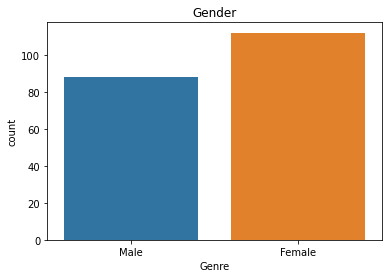

In [8]:
sns.countplot(x='Genre', data=data).set(title='Gender')


In [9]:
def pie(data,column):    
    fig, ax = plt.subplots(1,1, figsize = (6, 5))
    data = column.value_counts()                                                                                        
    labels =data.keys()   
    plt.pie(x = data, autopct = "%.1f%%", labels = labels, pctdistance = 0.5);
    plt.title(column.name)

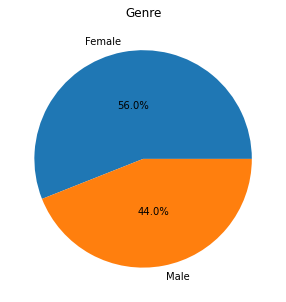

In [10]:
pie(data,data.Genre)

[Text(0.5, 1.0, 'Annual Income (k$)')]

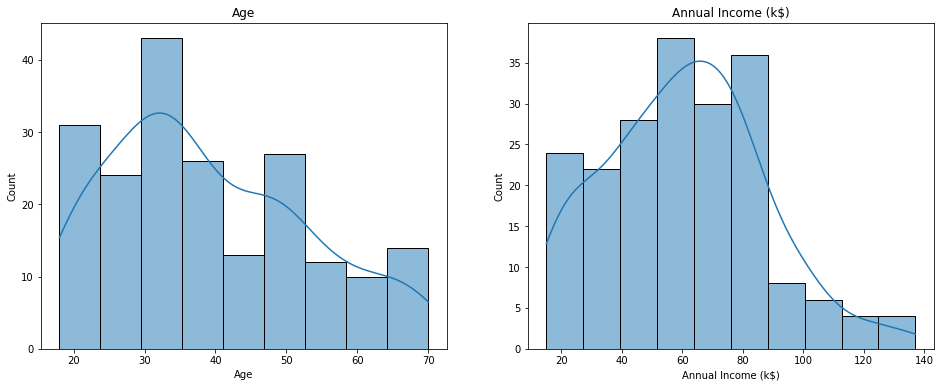

In [11]:
fig, ax = plt.subplots(1,2, figsize= (16,6))
sns.histplot(x='Age', data=data, kde=True,ax= ax[0]).set(title='Age')

sns.histplot(x='Annual Income (k$)',kde=True, data=data, ax= ax[1]).set(title='Annual Income (k$)')

[Text(0.5, 1.0, 'Spending Score (1-100)')]

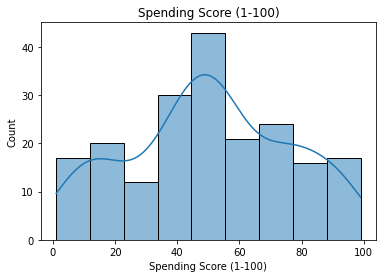

In [12]:
sns.histplot(x='Spending Score (1-100)',kde=True, data=data).set(title='Spending Score (1-100)')

Text(0.5, 1.0, 'Annual Income vs Spending Score')

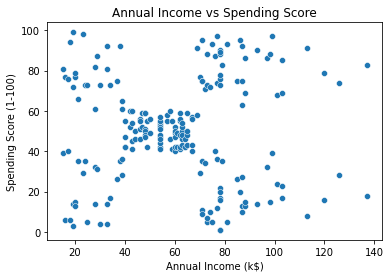

In [13]:
sns.scatterplot(x=data["Annual Income (k$)"],y=data["Spending Score (1-100)"])
plt.title("Annual Income vs Spending Score")

Text(0.5, 1.0, 'Age vs Spending Score')

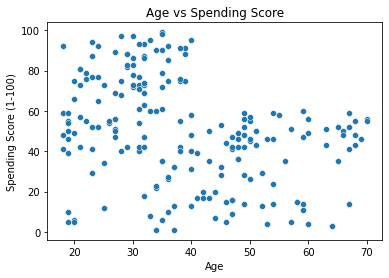

In [14]:
sns.scatterplot(x=data["Age"],y=data["Spending Score (1-100)"])
plt.title("Age vs Spending Score")

In [15]:
le=LabelEncoder()
data.Genre=le.fit_transform(data.Genre)


In [16]:

df=data.copy()

In [17]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [18]:
df.drop(["CustomerID","Genre","Age"],inplace=True,axis=1)

In [19]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [20]:
X = data.iloc[:, [3, 4]].values

In [21]:
s=[];name=[]

### k-means

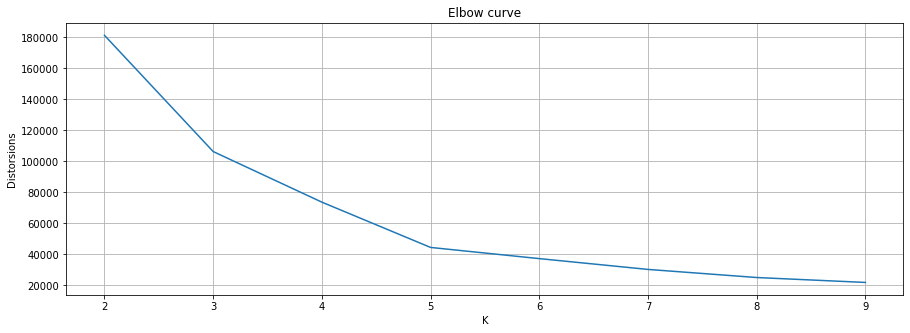

In [22]:
distorsions = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481
For n_clusters = 7 The average silhouette_score is : 0.5270287298101395
For n_clusters = 8 The average silhouette_score is : 0.4572211842776841
For n_clusters = 9 The average silhouette_score is : 0.45872989167156364
For n_clusters = 10 The average silhouette_score is : 0.4467356774401869


#### For n_clusters = 5 The average silhouette_score is : 0.553931997444648

In [24]:
s.append(0.55393)
name.append('K-Means')

In [25]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
#y_pred_kmeans = kmeans.predict(df)


KMeans(n_clusters=5)

In [26]:
cluster_centroid_m = kmeans.cluster_centers_
cluster_centroid_m

array([[88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

In [27]:
y_pred_kmeans=kmeans.fit_predict(X)

In [28]:
labels = kmeans.labels_
labels

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

Text(0.5, 1.0, 'Annual Income vs Spending Score (K-MEAN)')

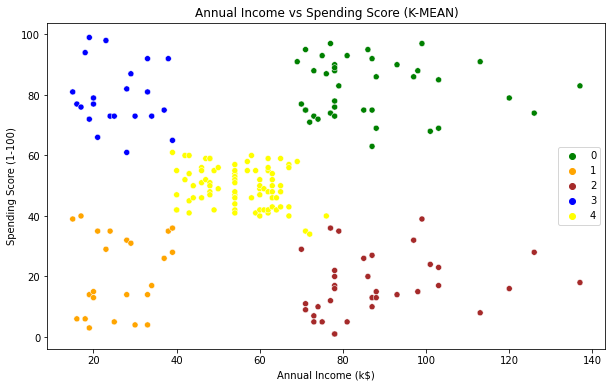

In [29]:
fig=plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue = y_pred_kmeans,palette=['green','orange','brown','blue','yellow'])
plt.title("Annual Income vs Spending Score (K-MEAN)")

### Hierarchical Clustering

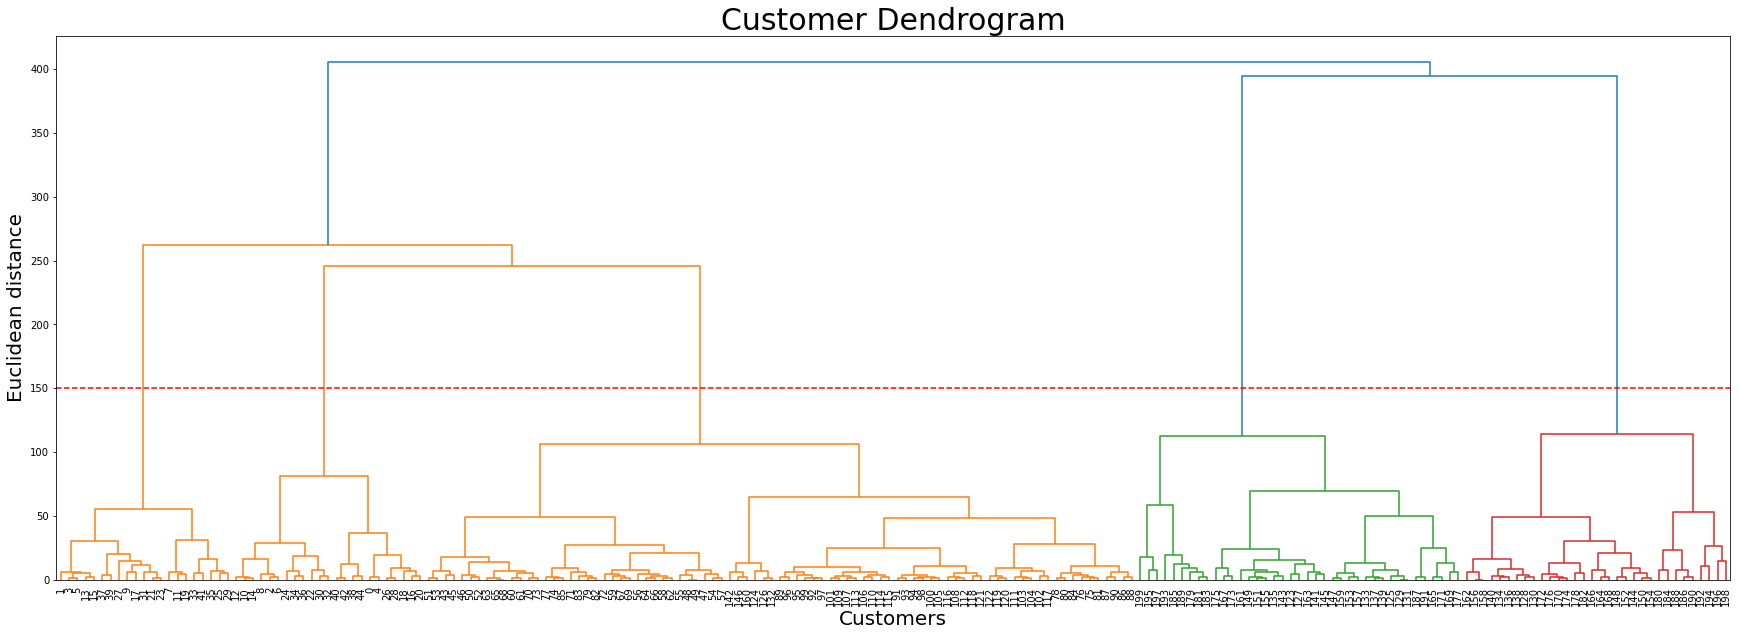

In [30]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df, method = 'ward'),labels=df.index)
plt.axhline(y=150, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [31]:
agg = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc = agg.fit_predict(df)

In [32]:
agg.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [33]:
print("Silhouette Coefficient: %0.9f" % metrics.silhouette_score(df, agg.labels_));

Silhouette Coefficient: 0.552994596


In [34]:
s.append(0.55287)
name.append('Agglomerative')

Text(0.5, 1.0, 'Annual Income vs Spending Score(Agglomerative)')

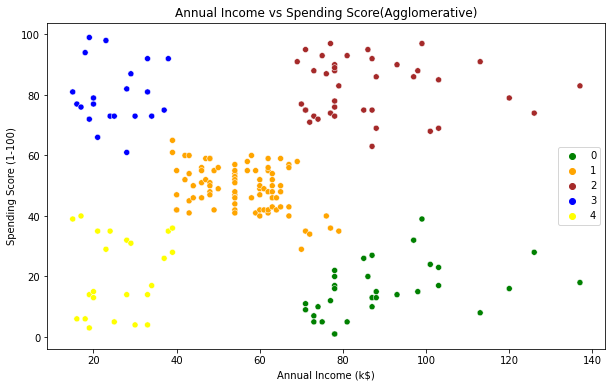

In [35]:
fig=plt.figure(figsize=(10,6))

sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue = y_hc,palette=['green','orange','brown','blue','yellow'])
plt.title("Annual Income vs Spending Score(Agglomerative)")

In [36]:
data['labels_agg']=agg.labels_

In [37]:
data['labels_agg'].value_counts()

1    85
2    39
0    32
4    23
3    21
Name: labels_agg, dtype: int64

In [38]:
data[data['labels_agg']==1]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),labels_agg
43,44,0,31,39,61,1
45,46,0,24,39,65,1
46,47,0,50,40,55,1
47,48,0,27,40,47,1
48,49,0,29,40,42,1
...,...,...,...,...,...,...
126,127,1,43,71,35,1
132,133,0,25,72,34,1
142,143,0,28,76,40,1
146,147,1,48,77,36,1


In [39]:
data


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),labels_agg
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,0
197,198,1,32,126,74,2
198,199,1,32,137,18,0


### DBSCAN

In [40]:
dbscan=DBSCAN()
dbscan.fit(df)

DBSCAN()

In [41]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

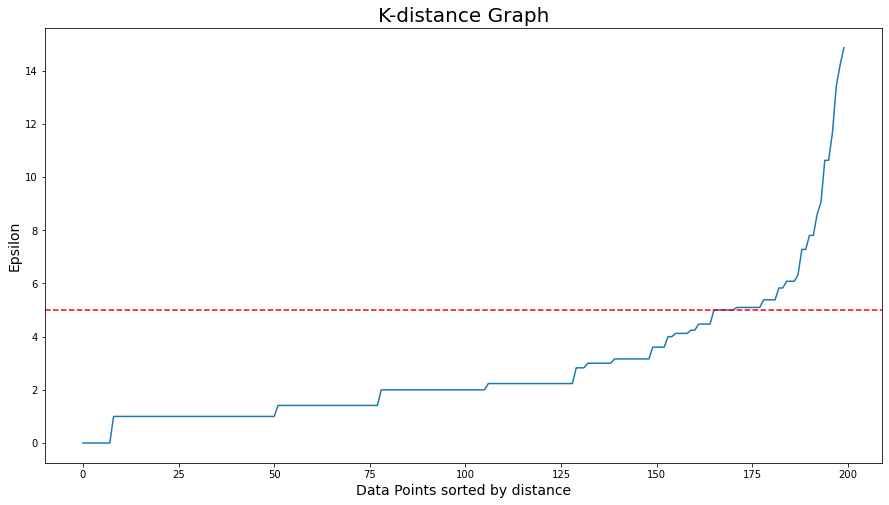

In [42]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=5, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [43]:
eps=5
for min_samples in range(3,10):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(df)

    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 5 | min_samples=  3 | obtained clustering:  [(1, 55), (2, 3), (3, 6), (4, 3), (5, 4), (6, 5), (7, 3), (8, 79), (9, 11), (10, 10), (11, 14), (12, 3), (13, 4)]
eps= 5 | min_samples=  4 | obtained clustering:  [(1, 76), (2, 6), (3, 79), (4, 10), (5, 10), (6, 11), (7, 4), (8, 4)]
eps= 5 | min_samples=  5 | obtained clustering:  [(1, 87), (2, 6), (3, 78), (4, 10), (5, 9), (6, 10)]
eps= 5 | min_samples=  6 | obtained clustering:  [(1, 100), (2, 76), (3, 10), (4, 6), (5, 8)]
eps= 5 | min_samples=  7 | obtained clustering:  [(1, 116), (2, 76), (3, 8)]
eps= 5 | min_samples=  8 | obtained clustering:  [(1, 120), (2, 72), (3, 8)]
eps= 5 | min_samples=  9 | obtained clustering:  [(1, 129), (2, 71)]


In [44]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=5,min_samples=6)
dbscan.fit(df)

DBSCAN(eps=5, min_samples=6)

In [45]:
y_pred_hdbscan=dbscan.fit_predict(df)

In [46]:
df['DBSCAN_opt_labels']=dbscan.labels_
df['DBSCAN_opt_labels'].value_counts()

-1    100
 0     76
 1     10
 3      8
 2      6
Name: DBSCAN_opt_labels, dtype: int64

Silhouette Coefficient: 0.06545


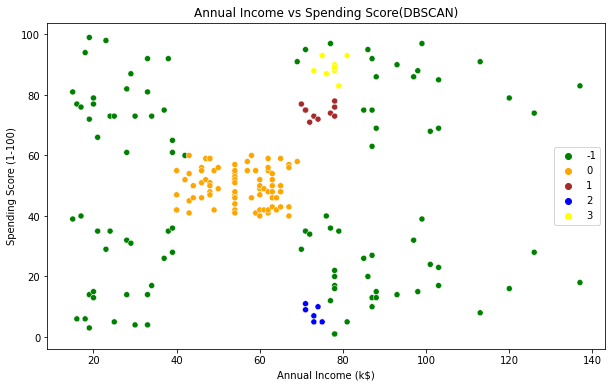

In [47]:
fig=plt.figure(figsize=(10,6))

sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue = y_pred_hdbscan,palette=['green','orange','brown','blue','yellow'])
plt.title("Annual Income vs Spending Score(DBSCAN)");
print("Silhouette Coefficient: %0.5f" % metrics.silhouette_score(df, df['DBSCAN_opt_labels']));

In [48]:
s.append(0.03873)
name.append('DBSCAN')

In [49]:
final_s=pd.DataFrame(list(zip(name,s)),columns=['Algorithm','silhouette_score']).set_index('Algorithm').sort_values(by='silhouette_score',ascending=False)


In [50]:
final_s

,silhouette_score
Algorithm,
K-Means,0.55393
Agglomerative,0.55287
DBSCAN,0.03873


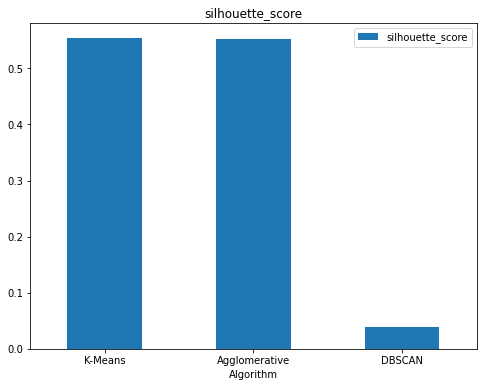

In [51]:
final_s.plot(kind='bar',figsize=(8,6))
plt.xticks(rotation = 0);
plt.title('silhouette_score');